In [1]:
import numpy as np
# from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

In [2]:
df = pd.read_csv('http://www.stat.uchicago.edu/~nicolae/118/data_2018.csv')
df

,YEAR,STATEFIP,METRO,AGE,SEX,RACE,MARST,VETSTAT,CITIZEN,HISPAN,...,VOTEHOW,VOTEWHEN,VOREGHOW,VOTED,VOREG,VOSUPPWT,MARRSIMPLE,RACESIMPLE,HISPSIMPLE,EDUSIMPLE
0,2018,1,2,48,2,200,4,1,1,0,...,1,1,5,2,99,1957.3134,2,2,0,2
1,2018,1,2,53,2,200,4,1,1,0,...,1,1,3,2,99,1687.7836,2,2,0,3
2,2018,1,2,20,2,200,6,1,1,0,...,1,1,3,2,99,2678.8328,3,2,0,3
3,2018,1,2,61,1,200,1,2,1,0,...,1,1,5,2,99,1753.9945,1,2,0,3
4,2018,1,2,62,2,200,1,1,1,0,...,1,1,97,2,99,1778.5886,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72999,2018,56,4,69,1,100,1,2,1,0,...,1,1,97,2,99,256.5947,1,1,0,4
73000,2018,56,4,60,2,100,1,1,1,0,...,1,1,97,2,99,226.8820,1,1,0,5
73001,2018,56,4,30,1,100,6,1,1,0,...,1,1,97,2,99,313.3757,3,1,0,6
73002,2018,56,4,56,1,100,6,2,1,0,...,1,2,7,2,99,265.6089,3,1,0,4


In [3]:
df["Age Band"] = pd.cut(df["AGE"], 5, labels=["18-32", "32-44", "44-58", "58-72", "72-85"]) #CREATE AGE BAND FEATURE

In [4]:
df["NEWRACE"] = df["RACE"] #CREATE NEW RACE FEATURE AS STRINGS RATHER THAN INTS
df["NEWRACE"] = df["NEWRACE"].replace([100], "White")
df["NEWRACE"] = df["NEWRACE"].replace([200], "Black")
df["NEWRACE"] = df["NEWRACE"].replace([651, 652], "Asian or Pacific Islander")
df["NEWRACE"] = df["NEWRACE"].replace([300], "Native American")
df["NEWRACE"] = df["NEWRACE"].replace([801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 830], "More than one race")

In [5]:
#CREATE STATE FEATURE THAT HAS STRINGS INSTEAD OF INTS FOR STATES

In [6]:
df["STATE"] = df["STATEFIP"]

In [7]:
states = {1: "Alabama", 2: "Alaska", 4: "Arizona", 5: "Arkansas", 6: "California", 8: "Colorado", 9: "Connecticut", 10: "Delaware", 11: "District of Columbia", 12: "Florida", 13: "Georgia", 15: "Hawaii", 16: "Idaho", 17: "Illinois", 18: "Indiana", 19: "Iowa", 20: "Kansas", 21: "Kentucky", 22: "Lousiana", 23: "Maine", 24: "Maryland", 25: "Massachusetts", 26: "Michigan", 27: "Minnesota", 28: "Missisippi", 29: "Missouri", 30: "Montana", 31: "Nebraska", 32: "Nevada", 33: "New Hampshire", 34: "New Jersey", 35: "New Mexico", 36: "New York", 37: "North Carolina", 38: "North Dakota", 39: "Ohio", 40: "Oklahoma", 41: "Oregon", 42: "Pennsylvania", 44: "Rhode Island", 45: "South Carolina", 46: "South Dakota", 47: "Tennessee", 48: "Texas", 49: "Utah", 50: "Vermont", 51: "Virgina", 53: "Washington", 54: "West Virginia", 55: "Wisconsin", 56: "Wyoming"}

In [8]:
for i in range(1, 57):
    if i in states: 
        df["STATE"].replace([i], states[i], inplace=True)

In [9]:
rvdf = df[df["VOREGHOW"] < 10] #CREATE DATAFRAME WITH ONLY INDIVIDUALS THAT REGISTERED TO VOTEa

In [10]:
nrvdf = df[df["VOYNOTREG"] != 99] #CREATE DATAFRAME WITH ONLY INDIVIDUALS THAT DID NOT REGISTER TO VOTE

In [11]:
nvdf = df[df["VOWHYNOT"] < 96] #CREATE DATAFRAME WITH ONLY INDIVIDUALS THAT DID NOT VOTE

# Part A: Voter Registration Analysis

## VOREG ***(todo)***

## VOREGHOW ***(todo)***

## VOYNOTREG

## For each age group, what is the most popular reason for not voting ?

In [12]:
whyNotVoteBasedOnAge = nrvdf[["Age Band", "VOYNOTREG"]].groupby("Age Band").agg(pd.Series.mode)
whyNotVoteBasedOnAge.rename(columns={'VOYNOTREG': "Most popular reason for not registering to vote"}, inplace=True)
whyNotVoteBasedOnAge.replace([6], "Not interested in politics or the election", inplace=True)
whyNotVoteBasedOnAge

,Most popular reason for not registering to vote
Age Band,
18-32,Not interested in politics or the election
32-44,Not interested in politics or the election
44-58,Not interested in politics or the election
58-72,Not interested in politics or the election
72-85,Not interested in politics or the election


The most popular reason for not registering to vote *across all age bands* was **Not being interested in the election or politics**. So, the reason for not registering to vote did not vary across ages.

## Next, did the most popular reason that voters did not register vary across sex ?

In [13]:
whyNotVoteBasedOnSex = nrvdf[["SEX", "VOYNOTREG"]].groupby("SEX").agg(pd.Series.mode)
whyNotVoteBasedOnSex.rename(columns={'VOYNOTREG': "Most popular reason for not registering to vote"}, inplace=True)
whyNotVoteBasedOnSex.replace([6], "Not interested in politics or the election", inplace=True)
whyNotVoteBasedOnSex

,Most popular reason for not registering to vote
SEX,
1,Not interested in politics or the election
2,Not interested in politics or the election


The most popular reason for not registering to vote **did not vary across genders**. Both most males and most females said they did not register to vote because they were not interested in the election or politics.

## Finally, look at the most popular reason for why people did not register to vote across RACE

In [14]:
whyNotVoteBasedOnRace = nrvdf[["NEWRACE", "VOYNOTREG"]].groupby("NEWRACE").agg(pd.Series.mode)
whyNotVoteBasedOnSex.replace([6], "Not interested in politics or the election", inplace=True)
whyNotVoteBasedOnRace.rename(columns={'VOYNOTREG': "Most popular reason for not voting"}, inplace=True)
whyNotVoteBasedOnRace

,Most popular reason for not voting
NEWRACE,
Asian or Pacific Islander,6
Black,6
More than one race,6
Native American,6
White,6


Again, the reason for not registering to vote **did not vary across race**.

So, the reason for not registering to vote did not vary across age, sex, and race. All those who did not vote said they did not register to vote because they were not interested in the election or politics.

# Voter Turnout Analysis: (Part B)

# VOTED 

varied across the different factors. 

# How many people voted ?

In [15]:
df["VOTED"].value_counts()

2    48337
1    24667
Name: VOTED, dtype: int64

In [16]:
df.loc[df.VOTED == 1, "VOTED"] = 0

In [17]:
df.loc[df.VOTED == 2, "VOTED"] = 1

Above, we simply change the VOTED values to binary values (0 for didn't vote, 1 for did vote) to make it easier for us to compute averages.

In [18]:
df["VOTED"].value_counts()

1    48337
0    24667
Name: VOTED, dtype: int64

Doing a value count on the VOTED column tells us that most people voted (~66%). Now what we can do is try to see for each age from 18-80, the percentage of individuals of that age that voted.

# What ages voted the most and the least ?

In [19]:
df["Age Band"].value_counts()

44-58    17280
58-72    16648
32-44    14627
18-32    14313
72-85    10136
Name: Age Band, dtype: int64

In [20]:
ageVotes = df[["Age Band", "VOTED"]].groupby(["Age Band"], as_index=False).mean().sort_values(by="VOTED")

In [21]:
ageVotes.set_index("Age Band", drop=True, inplace=True)

Text(0.5, 1.0, 'Votership by Age Group')

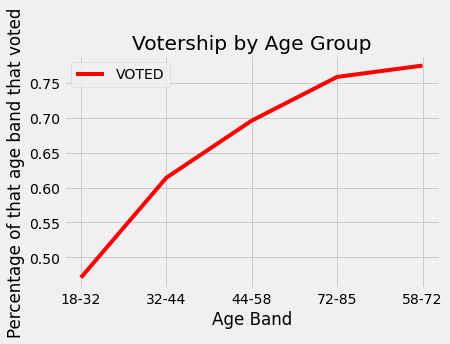

In [22]:
ageVotesGraph = ageVotes.plot(color="red")
ageVotesGraph.set_ylabel("Percentage of that age band that voted")
ageVotesGraph.set_title("Votership by Age Group")

As we can see from the above graph, those in the **age range of 58 to 72 had the highest votership of almost 80%**, whereas those in the **age range of 18 to 32 had the lowest voter turnout**.

Potential solutions: 
1. To increase voter turnout amongst the age group of 18-32 a possible solution could be to target college students in densely packed campuses by increasing education and awareness of the importance of voting by holding modules and education programs leading up to elections

# How does votership break down by race ?

In [23]:
df["RACE"].value_counts()

100    60827
200     7012
651     2810
300      908
802      447
652      268
801      257
803      205
805       51
804       51
810       44
809       38
813       34
806       13
812       11
808        5
814        5
817        5
807        3
811        3
816        3
815        2
820        1
830        1
Name: RACE, dtype: int64

We can already see that we have a large pool of values for the RACE feature that makes analysis tedious. To simplify our analysis, we will clean our data to focus on the following races: White (100), Black (200), Asian (651, 652) and Native American (300), and more than one race (801-830). Note that we can also use the RACESIMPLE feature to get this information without doing any further work, but for demonstration purposes, we will try cleaning the data ourselves. We will create this information in a column called *NEWRACE*.

In [24]:
raceVotes = df[["NEWRACE", "VOTED"]].groupby(["NEWRACE"], as_index=False).mean().sort_values(by="VOTED", ascending=False)
raceVotes.rename(columns={"NEWRACE": "RACE"}, inplace=True) #rename NEWRACE to clear ambigiouity
raceVotes.set_index("RACE", drop=True, inplace=True)
raceVotes

,VOTED
RACE,
Black,0.672847
White,0.670031
More than one race,0.604750
Asian or Pacific Islander,0.558155
Native American,0.475771


Text(0.5, 1.0, 'Votership by Race')

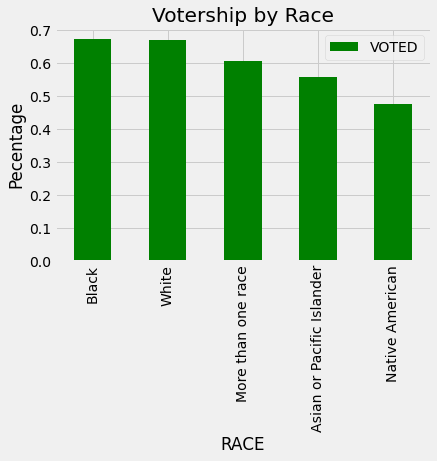

In [77]:
raceVotesGraph = raceVotes.plot.bar(color="green")
raceVotesGraph.set_ylabel("Pecentage")
raceVotesGraph.set_title("Votership by Race")

**We can conclude from our analysis of race that those who or Black and White are equally as likely to vote, each voting at about a 68% rate. Native Americans are the least likely to vote, with less than half of all Native Americans voting. Asian Americans also fall behind in votership, with 45% of their population abstaining from the polls. Those who hail from a background of more than one race are more likely to vote than Asian and Native Americans, but less likely than Black or White people.**

Solutions: 

## What does votership look like when considering Hispanic/Non-Hispanic ?

As a corollary to race, we should also look at how many of those with a Hispanic background did not vote, as they are historically under-educated, and thus I predict their votership numbers are down in comparison to Non-Hispanics. 0 = Non-Hispanics, 1 = Hispanics

In [26]:
df["HISPSIMPLE"].value_counts()

0    66371
1     6633
Name: HISPSIMPLE, dtype: int64

In [27]:
hispVotes = df[["HISPSIMPLE", "VOTED"]].groupby(["HISPSIMPLE"], as_index=False).mean()
hispVotes.rename(columns={"HISPSIMPLE": "Hispanic Ethnicity", "VOTED": "Voted"}, inplace=True)
hispVotes.replace([0], "Not Hispanic", inplace=True)
hispVotes.replace([1], "Hispanic", inplace=True)
hispVotes.set_index("Hispanic Ethnicity", drop=True, inplace=True)
hispVotes

,Voted
Hispanic Ethnicity,
Not Hispanic,0.675280
Hispanic,0.530378


Text(0.5, 1.0, 'Votership across Hispanic ethnicity')

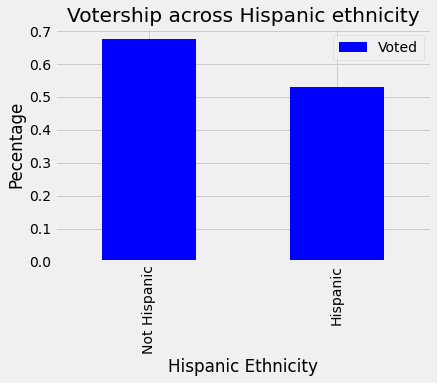

In [28]:
hispVotesGraph = hispVotes.plot.bar(color="blue")
hispVotesGraph.set_ylabel("Pecentage")
hispVotesGraph.set_title("Votership across Hispanic ethnicity")

**As I predicted, Hispanics were (14%) less likely to vote than their Non-Hispanic counterparts**

Solutions: 
    1. 

# How does martial status affect votership?

In [29]:
df["MARRSIMPLE"].value_counts()

1    41508
3    17754
2    13742
Name: MARRSIMPLE, dtype: int64

In [30]:
marrVotes = df[["MARRSIMPLE", "VOTED"]].groupby(["MARRSIMPLE"], as_index=False).mean().sort_values(by="VOTED",  ascending=False)

In [31]:
marrVotes['MARRSIMPLE'].replace([1],'Married', inplace=True)
marrVotes['MARRSIMPLE'].replace([2],'Divorced',inplace=True)
marrVotes['MARRSIMPLE'].replace([3],'Single',inplace=True)

In [32]:
marrVotes.set_index("MARRSIMPLE", drop=True, inplace=True)

Text(0.5, 1.0, 'Votership across martial status')

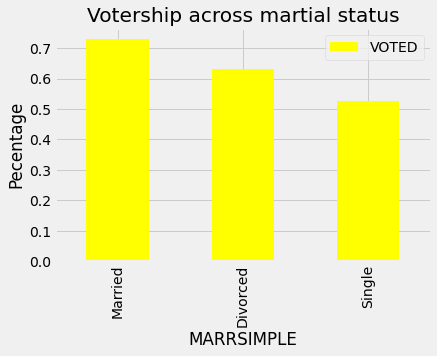

In [33]:
marrVotesGraph = marrVotes.plot.bar(color="yellow")
marrVotesGraph.set_ylabel("Pecentage")
marrVotesGraph.set_title("Votership across martial status")

Married people are more than 73% likely to vote, only 52% are voting amongst young/single poeple --> room for improvement Divorced = 63% Solutions:

People who are single are most likely younger --> target singles who are younger i.e. young professionals or students

# VOTEWHEN

In [34]:
df["VOTEWHEN"].value_counts()

1     30524
99    24667
2     17543
97      149
96       88
98       33
Name: VOTEWHEN, dtype: int64

In [35]:
vwdf = df[df["VOTEWHEN"] < 3] # create a new dataframe from the original dataframe and assign it to a variable so we dont modify the original dataset. 
#Get all the data for those that voted on election day OR before election date.

In [36]:
vwdf["VOTEWHEN"].value_counts()

1    30524
2    17543
Name: VOTEWHEN, dtype: int64

## How does when an individual voted differ by age ?

In [37]:
vwdf[["Age Band", "VOTEWHEN"]].groupby(["Age Band"]).agg(pd.Series.mode)

,VOTEWHEN
Age Band,
18-32,1
32-44,1
44-58,1
58-72,1
72-85,1


Across all age groups, **most people voted on the day of the election.**

## How does when an individual voted differ by race ?

In [38]:
vwdf[["NEWRACE", "VOTEWHEN"]].groupby(["NEWRACE"]).agg(pd.Series.mode)

,VOTEWHEN
NEWRACE,
Asian or Pacific Islander,1
Black,1
More than one race,1
Native American,1
White,1


Across all races, **most people voted on the day of the election.**

## VOTEWHYNOT

***Todo***

## Is there a strong relationship between voter registration and voter turnout ?

In [90]:
df["VOTED"].value_counts()

1    48337
0    24667
Name: VOTED, dtype: int64

In [91]:
df["VOREG"].value_counts()

99    48337
1     12049
2     11423
97     1080
96       70
98       45
Name: VOREG, dtype: int64

The dataset claims that although only ***12,049 people registered to vote***, ***48,337 people actually voted***. Based on the assumption that you most register to vote, I was only unable to verify the accuracy of the data, as I assume if `x` amount of people voted, then *at least* `x` amount of people registered. If **this is not the case**, then there is **not a strong relationship between voter registration and voter turnout**, as about 4x the amount of people that registered voted.

# Voting by Education (Part C)

## How does having a degree beyond high school influence voting ?

In [39]:
df["EDUSIMPLE"].value_counts()

2    20722
5    16018
3    13586
4     7809
6     6884
1     5436
7     2449
0      100
Name: EDUSIMPLE, dtype: int64

In [80]:
df["NEWEDU"] = df["EDUSIMPLE"]
df["NEWEDU"].replace(0, "No School", inplace=True)
df["NEWEDU"].replace(1, "Some school, no diploma", inplace=True)
df["NEWEDU"].replace(2, "GED", inplace=True)
df["NEWEDU"].replace(3, "Some college, no degree", inplace=True)
df["NEWEDU"].replace(4, "Associate", inplace=True)
df["NEWEDU"].replace(5, "Bachelors", inplace=True)
df["NEWEDU"].replace(6, "Masters", inplace=True)
df["NEWEDU"].replace(7, "Doctorate", inplace=True)
eduVotes = df[["NEWEDU", "VOTED"]].groupby(["NEWEDU"], as_index=False).mean().sort_values(by="VOTED")
eduVotes.rename(columns={"NEWEDU": "Level of Education", "VOTED": "Voted"}, inplace=True)
eduVotes.set_index("Level of Education", drop=True, inplace=True)
eduVotes

,Voted
Level of Education,
No School,0.270000
"Some school, no diploma",0.368837
GED,0.543143
"Some college, no degree",0.653467
Associate,0.693687
Bachelors,0.795293
Masters,0.854736
Doctorate,0.870559


Text(0.5, 1.0, 'Votership across education levels')

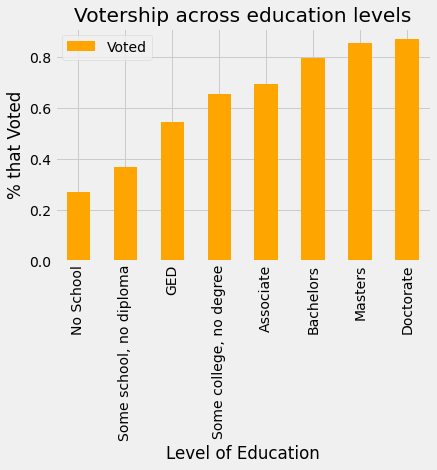

In [82]:
eduVotesGraph = eduVotes.plot.bar(color="orange")
eduVotesGraph.set_ylabel("% that Voted")
eduVotesGraph.set_title("Votership across education levels")

**As the level of education increases, voter turnout increases.**

Solutions: 
    1. focus on people who do a majority of unskilled labor i.e. blue collar workers (fastfood workers etc.) (bc probably less educated) and less on white collar workers i.e. professors, engineers etc. 

## Did the reason for not voting differ based on education ?

In [42]:
whyNotVoteBasedOnEdu = nvdf[["EDUSIMPLE", "VOWHYNOT"]].groupby(["EDUSIMPLE"]).agg(pd.Series.mode)
whyNotVoteBasedOnEdu

,VOWHYNOT
EDUSIMPLE,
0,11
1,1
2,5
3,5
4,5
5,5
6,5
7,5


The most popular reason for not voting for those with ***some school but no diploma*** was an **illness or disability**. For all those who didn't vote with a ***high school diploma and above***, the most popular reason for not voting was that they were **too busy, or had conflicting work or school schedules**.

# Voting by State (Part D)

## How do voting registration patterns vary by state ?

In [54]:
stateVoRegHow = rvdf[["STATE", "VOREGHOW"]].groupby(["STATE"], as_index=False).agg(pd.Series.mode).sort_values(by="VOREGHOW")

In [59]:
stateVoRegHow[["STATE", "VOREGHOW"]]

,STATE,VOREGHOW
25,Missouri,1
32,New York,1
36,Oklahoma,1
30,New Jersey,1
37,Oregon,1
28,Nevada,1
27,Nebraska,1
38,Pennsylvania,1
39,Rhode Island,1
22,Michigan,1


In [73]:
stateVoRegHowBuckets ={}

for val in stateVoRegHow["VOREGHOW"]:
    if val in stateVoRegHowBuckets: 
        stateVoRegHowBuckets[val] = stateVoRegHowBuckets[val] + 1
    else:
        stateVoRegHowBuckets[val] = 1

stateVoRegHowBuckets

{1: 28, 3: 2, 5: 16, 7: 4, 9: 1}

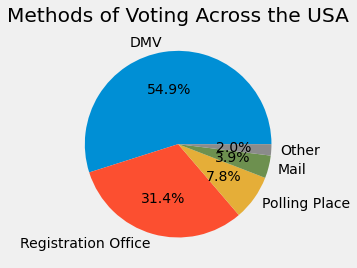

In [88]:
stateVoRegHowLabels = ["DMV", "Registration Office", "Polling Place", "Mail", "Other" ]
stateVoRegHowSizes = [28, 16, 4, 2, 1]
plots.pie(x=stateVoRegHowSizes, labels=stateVoRegHowLabels, autopct='%1.1f%%')
plots.title("Methods of Voting Across the USA")
plots.show()

So, the most popular way to register to vote across America is through the DMV (1) (28 states). The second most popular way to register is through a government registration office (5) (16 states). 

**TODO**: Analyze this, and then do same for VOYNOTREG (get most popular reason for not voting in each state)

## Which states had the highest percentage of those surveyed who did not vote ?

In [44]:
df["NOTVOTED"] = 1 - df["VOTED"] #CREATE NEW FEATURE 'NOTVOTED'

In [45]:
df[["STATE", "NOTVOTED"]].groupby(["STATE"]).mean().sort_values(by="NOTVOTED",ascending=False)

,NOTVOTED
STATE,
West Virginia,0.456546
Idaho,0.420921
Arkansas,0.417134
Tennessee,0.416177
Oklahoma,0.410122
New Mexico,0.405239
Hawaii,0.404277
Texas,0.403184
Kentucky,0.398907


**West Virginia had the highest percentage of people who did not vote** (~46%).